In [156]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
# iris : ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

In [157]:
iris.data
iris.target
iris.data.info()
iris.target_names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# do not need feature name as column header. Make it numpy array
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [159]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


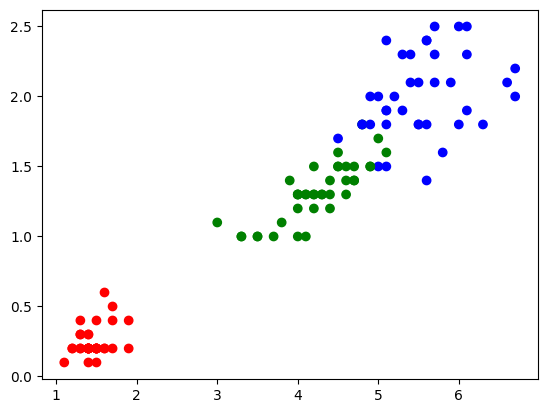

In [160]:
id_color = {0: u'red', 1: u'green', 2: u'blue'}
colors = pd.Series([id_color[i] for i in y_train])

plt.scatter( X_train[:,0],  X_train[:,1], c=colors)
plt.show()

In [161]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2) # Iris virginica. Make it binary classification problem

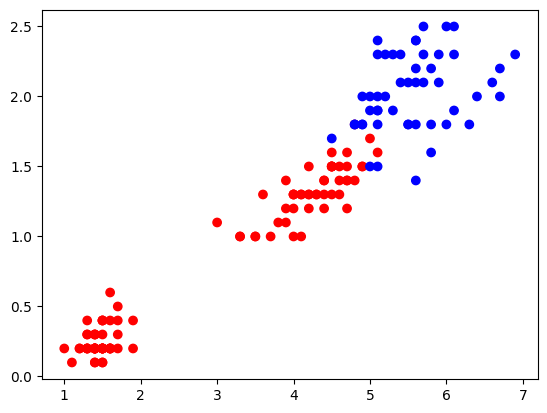

In [162]:
id_color = {0: u'red', 1: u'blue'}
colors = pd.Series([id_color[i] for i in y])

plt.scatter( X[:,0],  X[:,1], c=colors)
plt.show()

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC  # Support Vector Classifier
std_sclr = StandardScaler()
svc_mod = LinearSVC(C=1, random_state=42)  
svm_clf = make_pipeline(std_sclr, svc_mod)
svm_clf.fit(X, y)
#pipe_line.predict()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [164]:
X_new = np.array([[5.5, 1.7], [5.0, 1.5], [3.1, 1.5], [4.1, 2.3]])
svm_clf.predict(X_new)

array([ True, False, False,  True])

In [165]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063, -1.86403463,  0.79885274])

In [166]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

moon_ds = make_moons(n_samples=100, noise= 0.15, random_state=42 )
X  =moon_ds[0]
y = moon_ds[1]
#pip_ln = make_pipeline(PolynomialFeatures(2), StandardScaler())
#pip_ln.fit(moon_ds)



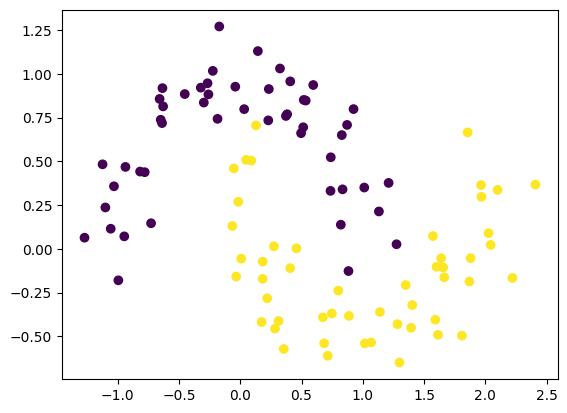

In [167]:
plt.scatter(X[:,0:1], X[:,1:2], c=y)
plt.show()
#X[:2, 1:2]

In [180]:
pil_ln = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10000, random_state=42))
pil_ln.fit(X,y)


#pip_ln.fit(moon_ds)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

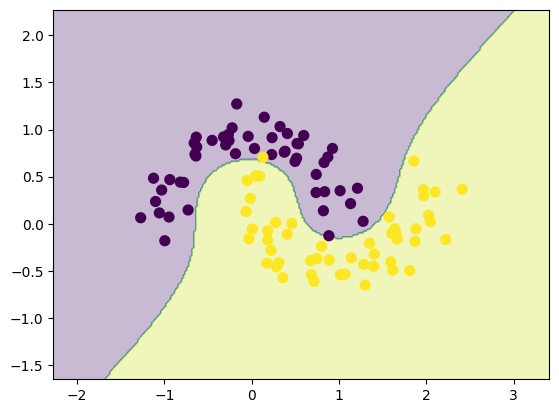

In [181]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.show()

plot_decision_boundary(pil_ln, X, y)

In [215]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

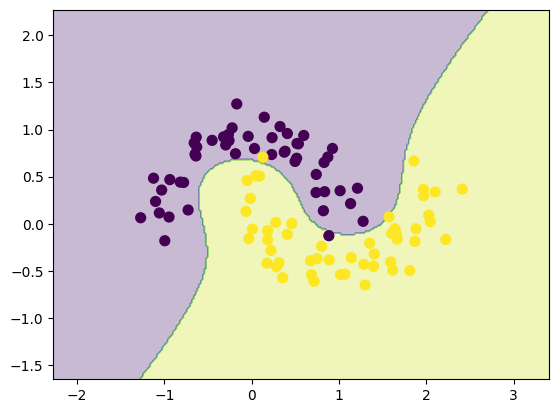

In [216]:
plot_decision_boundary(poly_kernel_svm_clf, X, y)

In [217]:
from sklearn.svm import LinearSVR  # Support Vector Regressor
